**Подключение библиотек**

In [17]:
import pandas as pd              # Таблицы
import numpy as np               # Математика
import scipy                     # Математика+
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt  # Графика

**Подгрузка Excel-таблиц**

In [6]:
data = pd.read_excel("Эксперименты.xlsx",
                     sheet_name="Эксперимент 1")
data  # Когда в Jupyter оставляешь переменную в последней строке - она выводится

,Скорость,Лох,Плох,Мох
0,1.5,1.0,0.0,2.0
1,2.5,4.0,1.0,4.0
2,3.5,5.0,1.2,5.0
3,4.5,6.4,1.3,5.6
4,5.5,6.8,1.4,5.9


In [12]:
столбцы = list(data.columns)[1:]
столбцы

['Лох', 'Плох', 'Мох']

$$\ln(y) = a + b \times \ln(x)$$
$$y = \exp(a + b \times \ln(x))$$

[[ 0.03711475 -0.02504735]
 [-0.02504735  0.01802542]]
Для столбца Лох a= 0.318366729238153 b= 0.9804105609515519
[[ 0.03711475 -0.02504735]
 [-0.02504735  0.01802542]]
Для столбца Плох a= -1.2091786917855791 b= 0.9665033476481967
[[ 0.03711475 -0.02504735]
 [-0.02504735  0.01802542]]
Для столбца Мох a= 0.6720711935874584 b= 0.6823696386741909


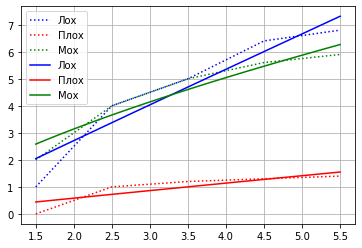

In [26]:
скорость = np.array(data["Скорость"])
данные = [np.array(data[i]) for i in столбцы]

# Отображение на графике всех столюцов в одном цикле
цвета = ["b", "r", "g"]  # blue, red, green
for i in range(len(столбцы)):
    plt.plot(скорость, данные[i], цвета[i]+":", label=столбцы[i])  # : - стиль линии
    
# Нахождение коэффициентов и аппроксимация
def аппроксимируем(x, a, b):
    """Функция для аппроксимации"""
    return np.exp(a + b * np.log(x))

for i in range(len(столбцы)):
    параметры, _ = curve_fit(аппроксимируем, скорость, данные[i])
    a, b = параметры
    print(d)
    print("Для столбца", столбцы[i], "a=", a, "b=", b)
    
    # Для построения новой траектории, сделаем новые (x,y) длины 100:
    x = np.linspace(скорость[0], скорость[-1], 100)  # Арифметическая последовательность от первого до последнего элемента
    y = аппроксимируем(x, a, b)
    plt.plot(x, y, цвета[i]+"-", label=столбцы[i])  # - - стиль линии
    
plt.legend() # Вывести легенду в угол графика
plt.grid()   # Включить сетку
plt.show()   # Вывести отрисованные линии на 1 графике